In [2]:
using BeamLib: IsotropicArray, steer, bartlett
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])
# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steer(pa, fc, Θ')*[s1; s2]
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# Bartlett spectrum 
# Same as steering dsb_weights
# but using the bartlett function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = bartlett(pa, Rxx, fc, deg2rad.(ϕaxis'))

360-element Vector{Float64}:
 8.461503812759034
 8.46127864065083
 8.460601257053444
 8.459466062892663
 8.45786373554618
 8.455781242669365
 8.453201861698124
 8.450105205174552
 8.446467252080973
 8.442260385406643
 ⋮
 8.467646053431201
 8.464369147184017
 8.461471462356618
 8.458977763868617
 8.456908978857843
 8.45528221015794
 8.454110747707041
 8.453404077658265
 8.453167889014196

In [3]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(P).indices]

2-element Vector{Float64}:
 10.779944289693589
 76.46239554317549

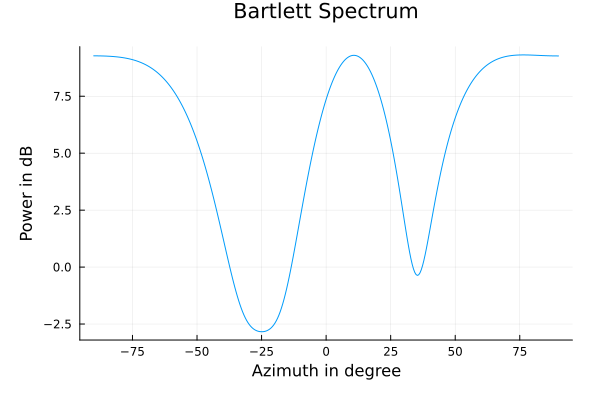

In [4]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="Bartlett Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")